In [200]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#read in words
words = open("../names.txt", 'r').read().splitlines()

In [202]:
chars = sorted(list((set(''.join(words)))))	#join creates one massive string of all characters, set sorts out doubles
stoi = {s:i+1 for i, s in enumerate(chars)}	#enumerate maps an index to elements in a list
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [203]:
# build the dataset

block_size = 3 # context length: how many chars do we use to predict the next one
X, Y = [], []

for w in words[:5]:
	print(w)
	context = [0] * block_size
	for ch in w + '.':
		ix = stoi[ch]
		X.append(context)	#list of lists of the 3 chars
		Y.append(ix)	#list of the outputs
		print(''.join(itos[i] for i in context), "---->", itos[ix])
		context = context[1:] + [ix] #crop context by first element and add ix

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ----> e
..e ----> m
.em ----> m
emm ----> a
mma ----> .
olivia
... ----> o
..o ----> l
.ol ----> i
oli ----> v
liv ----> i
ivi ----> a
via ----> .
ava
... ----> a
..a ----> v
.av ----> a
ava ----> .
isabella
... ----> i
..i ----> s
.is ----> a
isa ----> b
sab ----> e
abe ----> l
bel ----> l
ell ----> a
lla ----> .
sophia
... ----> s
..s ----> o
.so ----> p
sop ----> h
oph ----> i
phi ----> a
hia ----> .


In [204]:
C = torch.randn((27, 2))

In [205]:
C[5]	#we will use just indexing because it's much faster

tensor([-0.0073,  0.0468])

In [206]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C	#the one hot encoding 'plucks out' the 5th row

tensor([-0.0073,  0.0468])

In [207]:
# C[X[1]] = C[[0, 0, 5]] = C[0], C[0], C[5]

In [208]:
emb = C[X] #will go into C and take out the 2 values that are in position in the row for each value in X
emb.shape

torch.Size([32, 3, 2])

In [209]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [210]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape	#embeddings for every first, second and third character of the 32 context lists


torch.Size([32, 6])

In [211]:
emb

tensor([[[ 0.1545,  2.0033],
         [ 0.1545,  2.0033],
         [ 0.1545,  2.0033]],

        [[ 0.1545,  2.0033],
         [ 0.1545,  2.0033],
         [-0.0073,  0.0468]],

        [[ 0.1545,  2.0033],
         [-0.0073,  0.0468],
         [-0.3726,  0.5352]],

        [[-0.0073,  0.0468],
         [-0.3726,  0.5352],
         [-0.3726,  0.5352]],

        [[-0.3726,  0.5352],
         [-0.3726,  0.5352],
         [-1.1171, -1.1856]],

        [[ 0.1545,  2.0033],
         [ 0.1545,  2.0033],
         [ 0.1545,  2.0033]],

        [[ 0.1545,  2.0033],
         [ 0.1545,  2.0033],
         [-0.9103,  0.9157]],

        [[ 0.1545,  2.0033],
         [-0.9103,  0.9157],
         [-0.6401, -0.4721]],

        [[-0.9103,  0.9157],
         [-0.6401, -0.4721],
         [-0.5178, -1.5965]],

        [[-0.6401, -0.4721],
         [-0.5178, -1.5965],
         [ 0.0313, -0.1588]],

        [[-0.5178, -1.5965],
         [ 0.0313, -0.1588],
         [-0.5178, -1.5965]],

        [[ 0.0313, -0

In [212]:
torch.unbind(emb, 1) #gives us a list of 3 tensors, each with the first (sencond, third) character embeddings

(tensor([[ 0.1545,  2.0033],
         [ 0.1545,  2.0033],
         [ 0.1545,  2.0033],
         [-0.0073,  0.0468],
         [-0.3726,  0.5352],
         [ 0.1545,  2.0033],
         [ 0.1545,  2.0033],
         [ 0.1545,  2.0033],
         [-0.9103,  0.9157],
         [-0.6401, -0.4721],
         [-0.5178, -1.5965],
         [ 0.0313, -0.1588],
         [ 0.1545,  2.0033],
         [ 0.1545,  2.0033],
         [ 0.1545,  2.0033],
         [-1.1171, -1.1856],
         [ 0.1545,  2.0033],
         [ 0.1545,  2.0033],
         [ 0.1545,  2.0033],
         [-0.5178, -1.5965],
         [ 0.7637,  0.6434],
         [-1.1171, -1.1856],
         [-1.4947, -1.5738],
         [-0.0073,  0.0468],
         [-0.6401, -0.4721],
         [ 0.1545,  2.0033],
         [ 0.1545,  2.0033],
         [ 0.1545,  2.0033],
         [ 0.7637,  0.6434],
         [-0.9103,  0.9157],
         [ 0.7912,  1.1133],
         [-0.4361, -0.4488]]),
 tensor([[ 0.1545,  2.0033],
         [ 0.1545,  2.0033],
         [-0

In [213]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [214]:
a.view(2, 9)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [215]:
a.view(3, 2, 3)

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17]]])

A tensor is represented in memory always as a 1-d vector (a list of numbers), and the attributes after determine how this list is interpreted. that's why .view() can change the tensor very efficiently, without changing memory, just by changing the way the list of numbers is interpreted

In [216]:
#transform the 3 x 2 tensors for each context batch into one 6d vector per context list (output: 32 batches with 6 values each)
# for -1, pytorch will infer the number of rows
emb.view(-1, 6)

tensor([[ 0.1545,  2.0033,  0.1545,  2.0033,  0.1545,  2.0033],
        [ 0.1545,  2.0033,  0.1545,  2.0033, -0.0073,  0.0468],
        [ 0.1545,  2.0033, -0.0073,  0.0468, -0.3726,  0.5352],
        [-0.0073,  0.0468, -0.3726,  0.5352, -0.3726,  0.5352],
        [-0.3726,  0.5352, -0.3726,  0.5352, -1.1171, -1.1856],
        [ 0.1545,  2.0033,  0.1545,  2.0033,  0.1545,  2.0033],
        [ 0.1545,  2.0033,  0.1545,  2.0033, -0.9103,  0.9157],
        [ 0.1545,  2.0033, -0.9103,  0.9157, -0.6401, -0.4721],
        [-0.9103,  0.9157, -0.6401, -0.4721, -0.5178, -1.5965],
        [-0.6401, -0.4721, -0.5178, -1.5965,  0.0313, -0.1588],
        [-0.5178, -1.5965,  0.0313, -0.1588, -0.5178, -1.5965],
        [ 0.0313, -0.1588, -0.5178, -1.5965, -1.1171, -1.1856],
        [ 0.1545,  2.0033,  0.1545,  2.0033,  0.1545,  2.0033],
        [ 0.1545,  2.0033,  0.1545,  2.0033, -1.1171, -1.1856],
        [ 0.1545,  2.0033, -1.1171, -1.1856,  0.0313, -0.1588],
        [-1.1171, -1.1856,  0.0313, -0.1

In [217]:
h = torch.tanh(emb.view(32, 6) @ W1 + b1)	#multiply with each weight

In [218]:
h.shape

torch.Size([32, 100])

In [219]:
W2 = torch.rand(100, 27)	#last layer with 100 inputs and 27 outputs
b2 = torch.rand(27)

In [220]:
logits = h @ W2 + b2

In [221]:
#softmax
#normalize over rows, so that all 27 probabilities for each char output for all 32 batches sum to 1
counts = logits.exp()
prob = counts / counts.sum(1, keepdim=True)

In [222]:
# will iterate over all 32 rows in prob and pluck out the Y value, so we get the current probability for the right value
# ideally each of these should be 1, then the next character would have been predicted correctly
loss = -prob[torch.arange(32), Y].log().mean()

In [223]:
# this is cross_entropy loss
# softmax + neg log likelihood for probabilites for Y values

counts = logits.exp()	#softmax
prob = counts / counts.sum(1, keepdim=True)
loss = -prob[torch.arange(32), Y].log().mean()

In [224]:
# ----- rewrite -----

In [369]:
# Hyperparameters
CONTEXT_LEN = 4
EMB_DIM = 10	#embedding dimensions
HL_NEURONS = 200	#hidden layer neurons
STEPS = 200000		# n steps
BATCH_SIZE = 64	#batch size

In [370]:
# build the dataset

def build_dataset(words):
	block_size = CONTEXT_LEN # context length: how many chars do we use to predict the next one
	X, Y = [], []

	for w in words:
		#print(w)
		context = [0] * block_size
		for ch in w + '.':
			ix = stoi[ch]
			X.append(context)	#list of lists of the batchsize chars
			Y.append(ix)	#list of the outputs
			context = context[1:] + [ix] #crop context by first element and add ix

	X = torch.tensor(X)
	Y = torch.tensor(Y)
	print(X.shape[0])
	return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))	#get 80% of words
n2 = int(0.9*len(words))	#get 10% words

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

182580
22740
22826


In [371]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, EMB_DIM), generator=g)
W1 = torch.randn((CONTEXT_LEN*EMB_DIM, HL_NEURONS), generator=g)
b1 = torch.randn(HL_NEURONS, generator=g)
W2 = torch.randn((HL_NEURONS, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [372]:
sum(p.nelement() for p in parameters) #get number of all parameters

13897

In [373]:
for p in parameters:
	p.requires_grad = True

In [374]:
# create exponential learning rate (starts at 0.001 and grows faster and faster to 1)
lre = torch.linspace(-3, 0, STEPS)	#create linear steps between -3 and 0
lrs = 10**lre

In [375]:
lri = []
lossi = []
stepi = []

In [376]:
for i in range(STEPS):

	#minibatch construct
	ix = torch.randint(0, Xtr.shape[0], (BATCH_SIZE,))	#to get 32 random numbers between 0 and amount_examples

	# forward pass
	emb = C[Xtr[ix]]	#create embeddings from minibatches (32, 3, 2)
	h = torch.tanh(emb.view(-1, CONTEXT_LEN*EMB_DIM) @ W1 + b1)	#multiply with each weight
	logits = h @ W2 + b2
	loss = F.cross_entropy(logits, Ytr[ix])	#softmax + average nll of target values

	#backward pass
	for p in parameters:
		p.grad = None
	loss.backward()

	#update
	# lr = lrs[i]
	lr = 0.1 if i < 100000 else 0.01
	for p in parameters:
		p.data += -lr * p.grad

	# track stats
	lri.append(lre[i])
	lossi.append(loss.log10().item())
	stepi.append(i)

print("Loss (for batch):", loss.item())

Loss (for batch): 2.1223535537719727


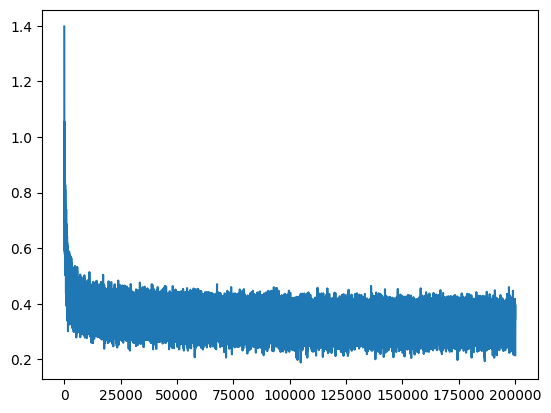

In [355]:
plt.plot(stepi, lossi)

In [366]:
# loss for whole training dataset
emb = C[Xtr]	#create embeddings from minibatches (32, 3, 2)
h = torch.tanh(emb.view(-1, CONTEXT_LEN*EMB_DIM) @ W1 + b1)	#multiply with each weight
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)	#softmax + average nll of target values
loss.item()

2.1483829021453857

In [367]:
# loss for whole dev dataset
emb = C[Xdev]	#create embeddings from minibatches (32, 3, 2)
h = torch.tanh(emb.view(-1, CONTEXT_LEN*EMB_DIM) @ W1 + b1)	#multiply with each weight
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)	#softmax + average nll of target values
loss.item()

2.187002420425415

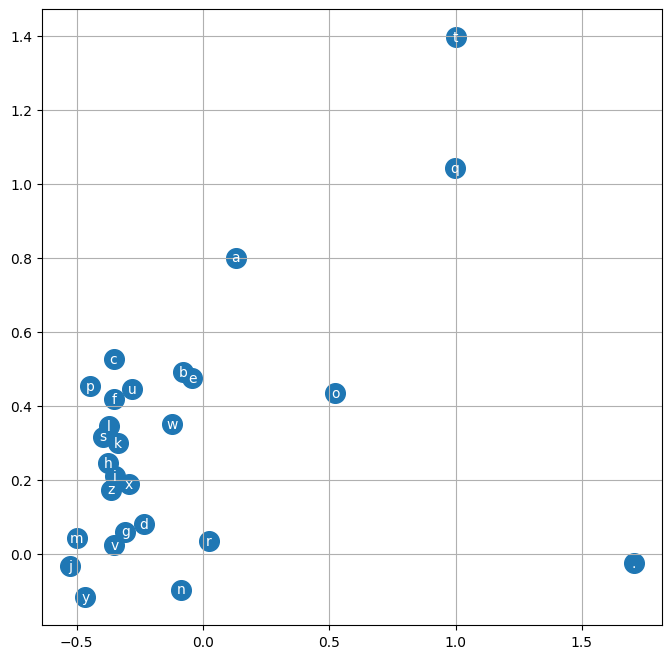

In [342]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

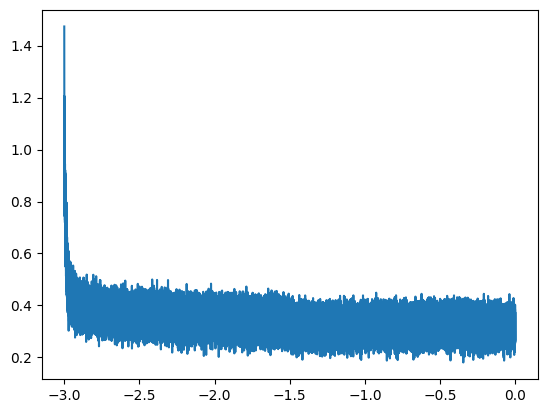

In [346]:
plt.plot(lri, lossi)	#check where loss is stable

In [377]:
def predict_next_char(context):
	emb = C[torch.tensor([context])]	#create embeddings from minibatches (32, 3, 2)
	h = torch.tanh(emb.view(1, -1) @ W1 + b1)	#multiply with each weight
	logits = h @ W2 + b2
	probs = F.softmax(logits, dim=1)	#softmax
	next_ix = torch.multinomial(probs, num_samples=1, generator=g).item()
	return next_ix

def generate_word(max_length=10):
	context = [0] * CONTEXT_LEN
	word = []
	while True:
		ix = predict_next_char(context)
		if ix == stoi['.']:
			break
		word.append(itos[ix])
		context = context[1:] + [ix]
	return ''.join(word)

print(loss.item())
for _ in range(10):
	print(generate_word(30))

2.1223535537719727
jamaram
nelok
requmerikyn
jaysir
jonrel
tian
jenamiyah
esmy
gijan
samae
